## Proyecto Final PDS 2023-1
### Mariana Noreña Vásquez
### CC 1000411870

## Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import warnings; warnings.filterwarnings("ignore")

from sympy import *
from scipy.io.wavfile import read
from scipy.io.wavfile import write
from scipy.signal import resample
from IPython.display import Audio
from scipy.signal import kaiserord, lfilter, firwin, freqz

%matplotlib inline

## 2. Filtrado de Señales

**2.1**  En base al ultimo dígito de su cedula (C), escoja una de las senales.

$sin(2pi*(1000+C)*t)+sin(2pi*(400+C)*t)+sin(2pi*(100+C)*t)+sin(2pi*(4000+C)*t)+sin(2pi*(2500+C)*t)$ para C par.

$cos(2pi*(500+C)*t)+cos(2pi*(40+C)*t)+cos(2pi*(300+C)*t)+cos(2pi*(1500+C)*t)+cos(2pi*(3000+C)*t)$ para C impar.

Grafique la señal resultante, escúchela e indique que percibe. La frecuencia de muestreo es $10K Hz + 100*C Hz$

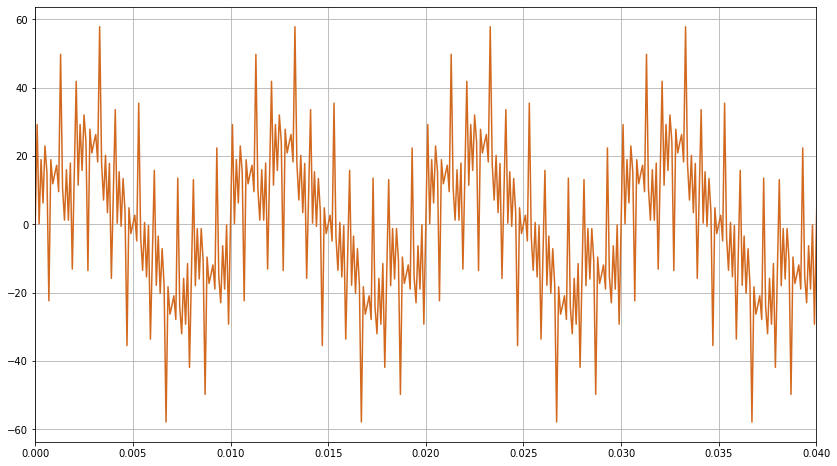

In [2]:
C = 0
fs = 10000.0 +100*C
t = np.arange(0, 30000/fs, 1.0/fs)
x = 10*np.sin(2*np.pi*1000*t) + 5*np.sin(2*np.pi*400*t)+20*np.sin(2*np.pi*100*t)+15*np.sin(2*np.pi*4000*t)+12*np.sin(2*np.pi*2500*t)

plt.figure(figsize=(14,8))
plt.plot(t, x, color='#D2691E')
plt.xlim(0,0.04)
plt.grid()

Audio(x,rate=fs)

- **Audio**: Se puede percibir diferentes sonidos siendo unos son más graves que otros.
- **Gráfica**: Se observa que la forma de la señal no es muy definida en los máximos y mínimos pero tiende a tener una forma sinusoidal. Si se amplia más el eje horizontal para visualizarla mejor se confirma que está compuesta por la suma de varias señales por los cambios de amplitud que se presentan  y se confirma que no está bien definida en lo valores mencionados anteriormente.

**2.2** Realice el espectro de la senal y observe si se encuentran las frecuencias empleadas en el  ́ıtem 1.

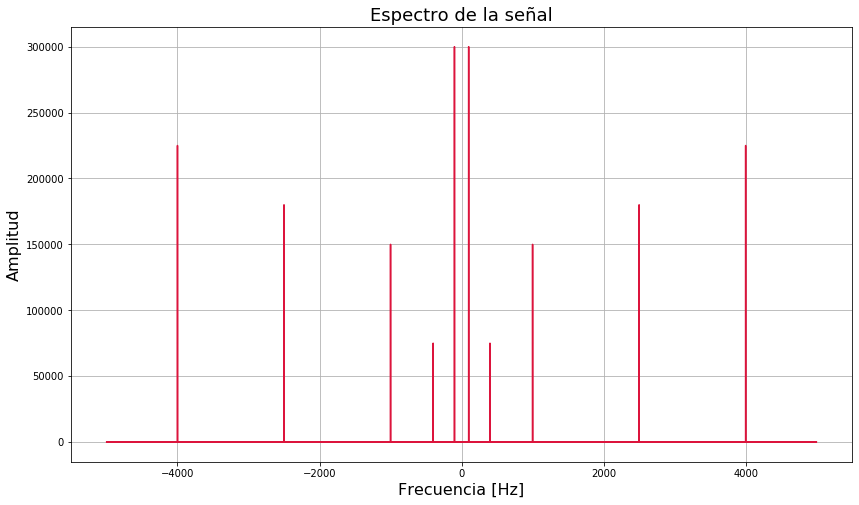

In [3]:
spec = np.fft.fft(x)
freqs = np.fft.fftfreq(len(x), d=1.0/fs)

plt.figure(figsize=(14,8))
plt.plot(freqs, np.abs(spec), color="#DC143C")
plt.title('Espectro de la señal', fontsize=18)
plt.xlabel('Frecuencia [Hz]', fontsize=16)
plt.ylabel('Amplitud', fontsize=16)
plt.grid()

**2.3** Disene un filtro FIR pasa-bajas empleando distintas frecuencias de corte (mínimo 2). Grafique la respuesta para cada uno. Tome el ancho de la banda de transicion como $100Hz$ y el ripple en dB de $50 + C$

**2.4** Pase la senal dada en el ıtem 1 por cada uno de los filtros realizados anteriormente. Grafique el espectro de cada señal filtrada y escuchelas. ¿Que puede decir del comportamiento cuando se cambia la frecuencia de corte?

### $fc=200 Hz$

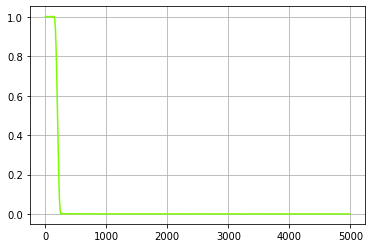

In [4]:
nyq_rate = fs/2.0
BW_hz = 100.0
fc = 200
width = BW_hz/nyq_rate
ripple_db = 50 
N, _ = kaiserord(ripple_db, width) 
taps = firwin(N, fc/nyq_rate, pass_zero='lowpass', width=width)
w, h = signal.freqz(taps, [1], worN=512)
plt.plot(nyq_rate*w/np.pi, np.abs(h), color='#7CFC00')
plt.grid()

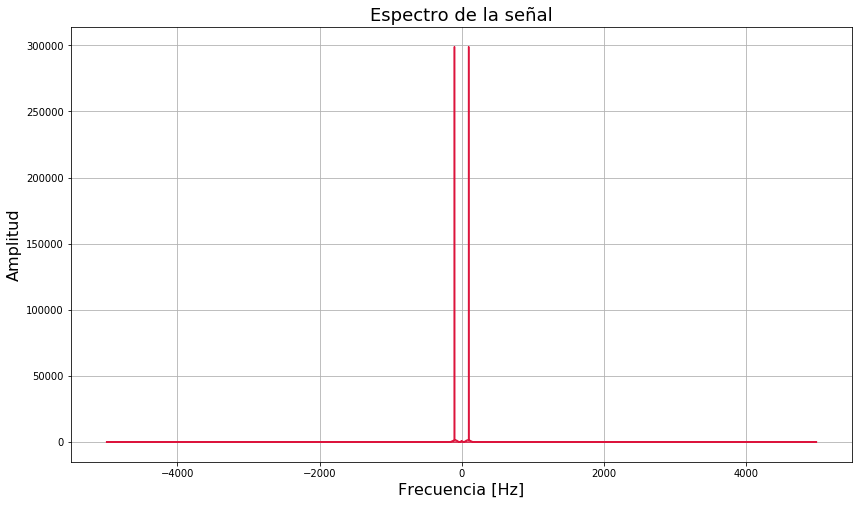

In [5]:
filtered_x = lfilter(taps, 1, x)

spec = np.fft.fft(filtered_x)
freqs = np.fft.fftfreq(len(filtered_x), d=1.0/fs)

plt.figure(figsize=(14,8))
plt.plot(freqs, np.abs(spec), color="#DC143C")
plt.title('Espectro de la señal', fontsize=18)
plt.xlabel('Frecuencia [Hz]', fontsize=16)
plt.ylabel('Amplitud', fontsize=16)
plt.grid()

Audio(filtered_x, rate=fs)

- **¿Qué se puede decir?**: Se escucha un zimbido muy grave y como se observa en su espectro, luego de filtrar solo se tiene la frecuencia menor de la señal debido a la frecuencia de corte usada.

## fc=1000 Hz

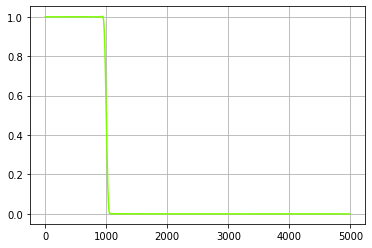

In [6]:
nyq_rate = fs/2.0
BW_hz = 100.0
fc = 1000
width = BW_hz/nyq_rate
ripple_db = 50 
N, _ = kaiserord(ripple_db, width) 
taps = firwin(N, fc/nyq_rate, pass_zero='lowpass', width=width)
w, h = signal.freqz(taps, [1], worN=512)
plt.plot(nyq_rate*w/np.pi, np.abs(h), color='#7CFC00')
plt.grid()

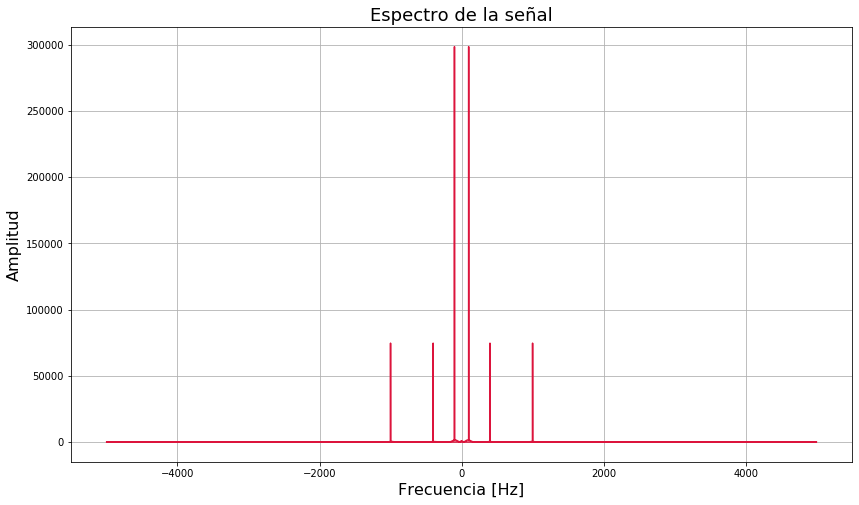

In [7]:
filtered_x = lfilter(taps, 1, x)

spec = np.fft.fft(filtered_x)
freqs = np.fft.fftfreq(len(filtered_x), d=1.0/fs)

plt.figure(figsize=(14,8))
plt.plot(freqs, np.abs(spec), color="#DC143C")
plt.title('Espectro de la señal', fontsize=18)
plt.xlabel('Frecuencia [Hz]', fontsize=16)
plt.ylabel('Amplitud', fontsize=16)
plt.grid()

Audio(filtered_x, rate=fs)

- **¿Cuando se cambia la frecuencia de corte?**: Se detectan otros sonidos más agudos al mencionado anteriormente. En el espectro se observan las frecuencias esperadas, no obstante, se tiene que la frecuencia de corte (1000 Hz) está incluida en él debido a que la respuesta del filtro no es ideal (tiene roll off) y además ésta está atenuada. Por tanto, cuando se varia la frecuencia de corte del filtro pasa-bajas se permite pasar más frecuencias bajas dependiendo del valor de $f_{c}$.

**2.5** ¿Que pasa si el ancho de la banda de transicion se modifica, es decir, cuando se toma un valor mas grande o uno más pequeno?

- Si es más pequeño, la caída entre la banda pasante y la banda atenuada será cada vez más rápida, mientras que si es más grande esta caída será cada vez más lenta.
- Si se toma un valor muy pequeño, la respuesta del filtro se va a acercar cada vez más a uno "ideal" dado que se estará limitando mucho más las frecuencias que se permiten y las que se atenúan.
- Si se toma un valor muy grande, se estará permitiendo que entren más frecuencias a parte de las que se quiere extraer y cada una tendrá una atenuación por estar en ese rango de transición.

**2.6** Disene un filtro FIR pasa-bandas con los mismos parametros dados en el  ́ıtem 3 y con las frecuencias de corte que desee. El objetivo es extraer las frecuencias que no esten en los extremos del espectro de la senal original. Escuche la senal filtrada e indique qué observa en su espectro.

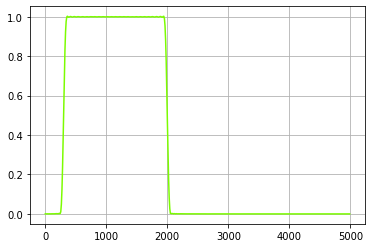

In [8]:
nyq_rate = fs/2.0
BW_hz = 100.0
fc1 = 300
fc2 = 2000
width = BW_hz/nyq_rate
ripple_db = 50 
N, _ = kaiserord(ripple_db, width) 
taps = firwin(N, [fc1/nyq_rate, fc2/nyq_rate], pass_zero='bandpass', width=width)
w, h = signal.freqz(taps, [1], worN=512)
plt.plot(nyq_rate*w/np.pi, np.abs(h), color='#7CFC00')
plt.grid()

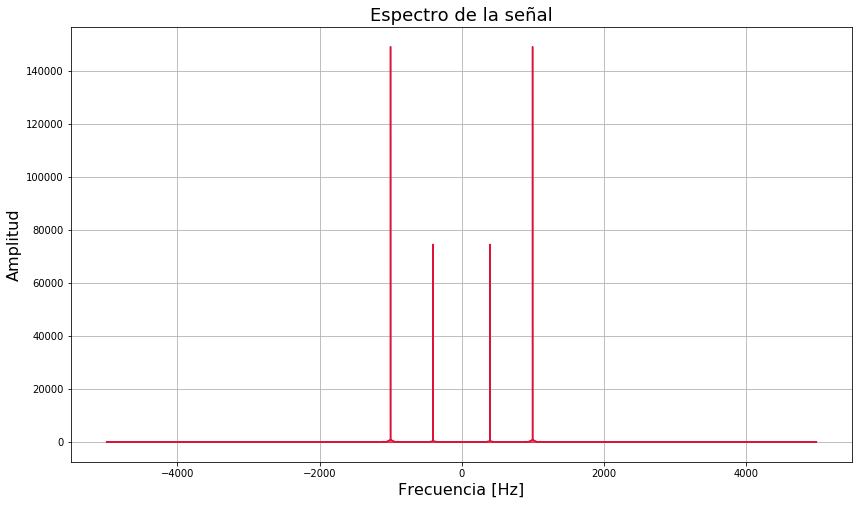

In [9]:
filtered_x = lfilter(taps, 1, x)

spec = np.fft.fft(filtered_x)
freqs = np.fft.fftfreq(len(filtered_x), d=1.0/fs)

plt.figure(figsize=(14,8))
plt.plot(freqs, np.abs(spec), color="#DC143C")
plt.title('Espectro de la señal', fontsize=18)
plt.xlabel('Frecuencia [Hz]', fontsize=16)
plt.ylabel('Amplitud', fontsize=16)
plt.grid()

Audio(filtered_x, rate=fs)

- Dado que las frecuencias de corte utilizadas son 300 y 2000 Hz, se espera que solo se muestren las frecuencias que están en dicho rango. Esto se puede observar en el espectro de la señal filtrada donde se muestra que las frecuencias presentes luego de pasar por el filtro corresponden a 400 y 1000 Hz. Cabe aclarar que ninguna de las dos está atenuada.
- Respecto al audio se puede decir que ya no está presente el sonido grave de la frecuencia menor de la señal utilizada pero siguen estando presenten dos sonidos correspondientes a las frecuencias resultantes del filtrado.

**2.7** Disene un filtro FIR pasa-altas con las mismas caracterısticas del ıtem 3. Extraiga la frecuencia mayor de la señal.

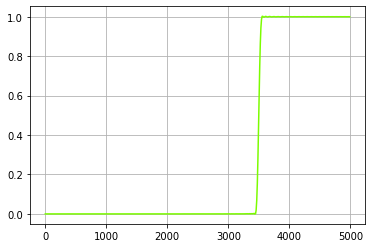

In [10]:
nyq_rate = fs/2.0
BW_hz = 100.0
fc = 3500
width = BW_hz/nyq_rate
ripple_db = 50 
N, _ = kaiserord(ripple_db, width) 
taps = firwin(N+1, fc/nyq_rate, pass_zero='highpass', width=width)
w, h = signal.freqz(taps, [1], worN=512)
plt.plot(nyq_rate*w/np.pi, np.abs(h), color='#7CFC00')
plt.grid()

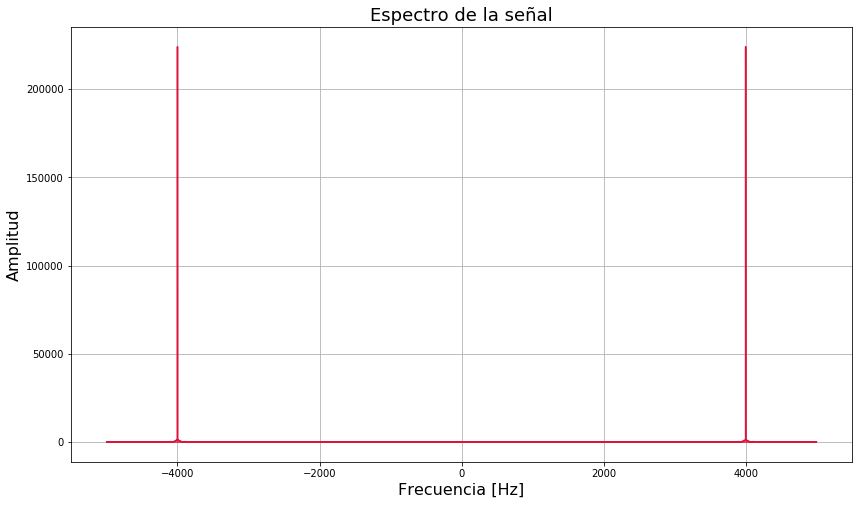

In [11]:
filtered_x = lfilter(taps, 1, x)

spec = np.fft.fft(filtered_x)
freqs = np.fft.fftfreq(len(filtered_x), d=1.0/fs)

plt.figure(figsize=(14,8))
plt.plot(freqs, np.abs(spec), color="#DC143C")
plt.title('Espectro de la señal', fontsize=18)
plt.xlabel('Frecuencia [Hz]', fontsize=16)
plt.ylabel('Amplitud', fontsize=16)
plt.grid()

Audio(filtered_x, rate=fs)

- En el espectro solo se muestra la frecuencia mayor de la señal y las demás son atenuadas, esto por emplear un filtro pasa-altas. Aunque se pudo emplear un filtro pasa-bandas para extraer únicamente esa frecuencia.
- En el audio se escucha un sonido muy agudo correspondiente a la frecuencia resultando luego del filtrado.

## 3. Análisis de filtros IIR

**3.1** Mostrar simbólicamente la función de transferencia del filtro analógico.

In [12]:
s = symbols('s')
t = symbols('t')
z = symbols('z')

num = s**2+0.25
den = s**2+0.5*s+0.25

Ha = num/den
print(Ha)

(s**2 + 0.25)/(s**2 + 0.5*s + 0.25)


**3.2** Mediante el método de aproximación por derivadas. ¿El filtro es estable?. Reemplaze $T=2$

In [13]:
def zeropoles(n, d=1):
    w,h = signal.freqz(n,d)
    sys1=signal.lti(n, d)
    ang=np.arange(0.0,2*np.pi,0.01)
    xp=np.cos(ang)
    yp=np.sin(ang)
    plt.figure(figsize=(10,8))
    plt.plot(xp,yp,'--')
    plt.title('Diagrama de polos y ceros', fontsize=18)
    plt.plot(sys1.zeros.real, sys1.zeros.imag, 'o')
    plt.plot(sys1.poles.real, sys1.poles.imag, 'x')
    plt.grid()
    plt.show()

In [14]:
Ha = Ha.subs(s,(1-z**-1)/t) #Se hace el reemplazo de la aproximacion en derivada
Ha = Ha.subs(t,2) #Se reemplaza la T por un valor escogido
Ha = simplify(Ha) #Se simplifica la expresion 
Ha #Se muestra la expresion

(2.0*z**2 - 2.0*z + 1.0)/(3.0*z**2 - 3.0*z + 1.0)

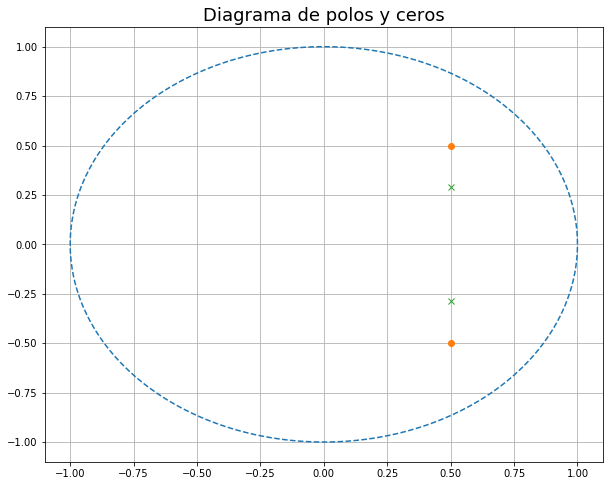

In [15]:
num = [2, -2.0, 1.0]
den = [3, -3, 1.0]

zeropoles(num,den)

Para el valor de $T=2$, el filtro digital IIR es estable ya que sus polos están dentro de la circunferencia unitaria

**3.3** Realice el mismo procedimiento del literal anterior, pero reemplazando $T=0.01$. ¿Sigue el filtro siendo estable para este valor?

In [16]:
Ha = Ha.subs(s,(1-z**-1)/t) #Se hace el reemplazo de la aproximacion en derivada
Ha = Ha.subs(t,0.1) #Se reemplaza la T por un valor escogido
Ha = simplify(Ha) #Se simplifica la expresion 
Ha #Se muestra la expresion

(2.0*z**2 - 2.0*z + 1.0)/(3.0*z**2 - 3.0*z + 1.0)

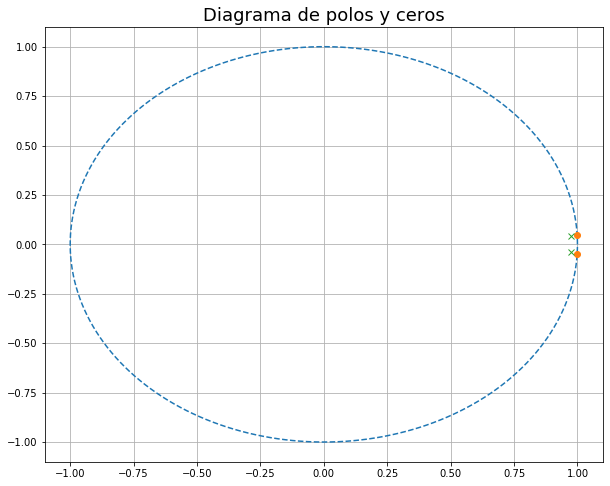

In [17]:
num = [100.25, -200, 100]
den = [105.25, -205, 100]

zeropoles(num,den)

Para $T=0.01$, el filtro sigue siendo estable. Sin embargo, se puede apreciar que si se decrementa más el valor de T el filtro dejará de ser estable.

**3.4** Mismo procedimiento con $T=0.001$

In [18]:
Ha = Ha.subs(s,(1-z**-1)/t) #Se hace el reemplazo de la aproximacion en derivada
Ha = Ha.subs(t,0.001) #Se reemplaza la T por un valor escogido
Ha = simplify(Ha) #Se simplifica la expresion 
Ha #Se muestra la expresion

(2.0*z**2 - 2.0*z + 1.0)/(3.0*z**2 - 3.0*z + 1.0)

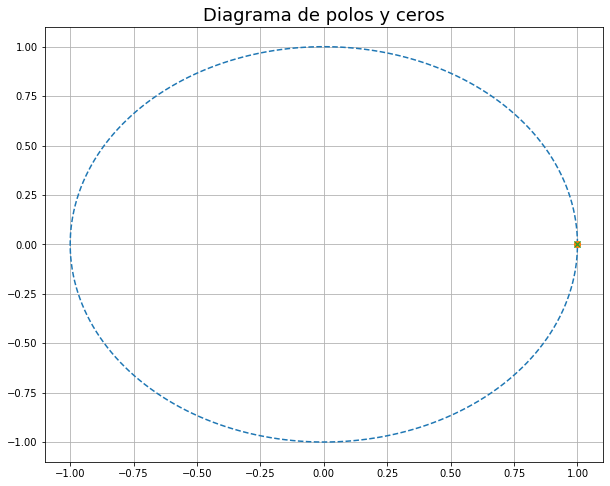

In [19]:
num = [1000000.25, -2000000, 1000000]
den = [1000500.25, -2000500, 1000000]

zeropoles(num,den)

Con este valor de T se puede evidenciar que el filtro digital IIR deja de ser estable para valores relativamente pequeños.

**3.5** A partir del filtro de primer orden Butterworth (diferente al dado inicialmente) encontrar el filtro digital IIR con una frecuencia de corte de $0.6\pi$ aplicando la transformacion bilineal. Muestre la funcion de transferencia del filtro luego de realizar el reemplazo correspondiente e indique si hay o no estabilidad.

$$H_{a}(s)=\frac{1}{1+\frac{s}{\Theta_{c}}}$$

In [20]:
s = symbols('s')
t = symbols('t')
z = symbols('z')

wc = 0.6*np.pi
theta_c = (2/t)*np.tan(wc/2)

Ha = 1/(1+(s/theta_c))
print(Ha)

1/(0.363271264002681*s*t + 1)


In [21]:
Ha = Ha.subs(s,(2/t)*((1-z**-1)/(1+z**-1))) #Se hace el reemplazo de la aproximacion en derivada
Ha = simplify(Ha) #Se simplifica la expresion 
Ha #Se muestra la expresion

(z + 1)/(1.72654252800536*z + 0.273457471994639)

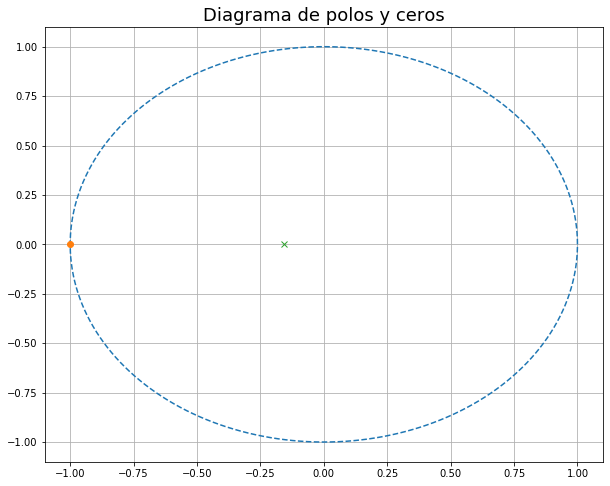

In [22]:
num = [1, 1]
den = [1.7265, 0.2734]

zeropoles(num,den)

- **¿Qué se puede interpretar?**: Del diagrama de polos y ceros se observa que hay estabilidad puesto que el polo se encuentra dentro del círculo unitario. Además, la ventaja se encuentra en que no se depende de un valor de $T$ para tener o no estabilidad en la respuesta del filtro.

## 4. Conclusiones

- Los filtros FIR se utilizan en el procesamiento de señales en diversos campos de aplicación debido a que tienen fase lineal, lo que permite que el filtrado sea óptimo y sin alteraciones en la salida de este.
- Los filtros FIR requieren de un orden muy grande para funcionar correctamente, por su parte, los filtros IIR no requieren un orden tan grande para cumplir la misma tarea.
- A partir del filtro pasa-bajas es posible construir los demás tipos de filtros. De igual manera, se emplean combinaciones con el filtro pasa-alta.
- Los filtros IIR son de gran utilidad siempre y cuando en la aplicación no sea fundamental tener una fase lineal.
- Es necesario que el filtro IIR implementado sea estable para que pueda cumplir con su respectiva función, por tanto, es esencial determinar los polos de este filtro digital y garantizar que se encuentren dentro del círculo unitario.
- Hay tres métodos que se usan para determinar el filtro digital IIR a partir de uno análogo. Se debe de tener en cuenta en que casos cada uno se puede utilizar. El método de la transformación bilineal se aplica para cualquier tipo de filtro mientras que los otros dos métodos tienen sus restricciones.
- Dependiendo de las frecuencias utilizadas en el diseño del filtro FIR, se pueden apreciar ciertos sonidos.